In [79]:
import pandas as pd
import numpy as np
import math
import time
import seaborn as sns

In [38]:
df = pd.read_csv("CleanedTitanic.csv")
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [39]:
# Test/Train Split
length = len(df.index)
splitPoint = int(length * 0.7)
train = df[0:splitPoint]
test = df[splitPoint:length]

# K-NN Algorithm

In [91]:
# K-NN Training Algorithm
def trainKNN(df, iterations):
  '''
  Pseudocode Algorithm
  1. Set K to 3 because this is the first odd value greater than the number of categories in the Titanic dataset.
  2. Create an empty list to collect accuracy values during training.
  2. Segment the training dataset into three equal parts: 
    - Segment 1: Class 1 labels
    - Segment 2: Class 2 labels
    - Segment 3: Remaining data of "unknown" labels 
  3. Calculate the euclidean distance between each data point in segment 3 with all data in segment 1 and segment 2. 
  4. Take the top K smallest distances to determine the label of the "unknown" data point.
  5. Append 0 to accuracy list if the label does not match the actual label. Append 1 to accuracy list if the label does match the actual label.
  6. Calculate the overall accuracy percent of the K value and append it to a dictionary of k, accuracy values.
  7. Add 2 to K and repeat steps 3 - 6 for a desired number of iterations.
  '''
  # Set initial value of k
  k = 3

  # Segment training data into 3 segments.
  class1, class2, unknowns = getSegments(df)
  
  # Calculate accuracy of K values for desired iterations
  count = 0
  accuracies = {}
  t0 = time.time() # for measuring how long it takes to compute
  t0_k = k
  while count < iterations:
    if count % 10 == 0:
      elapsed = time.time() - t0
      t0 = time.time()
      print(f"Took {elapsed:.2f} seconds to compute {t0_k}<=k<{k}")
      t0_k = k
    # Calculate percent accuracy for current k
    accuracy_at_k = calculateAccuracy(class1, class2, unknowns, k)
    accuracies[k] = accuracy_at_k
    k = k + 2
    count = count + 1
  
  return accuracies

# Helper Functions

In [92]:
def getSegments(df):
  # Segment training data into 3 segments. If not divisible by 3, add extra data to unknown segment.
  length = len(df.index)
  splitPoint = int(length/3)
  survived = df[df.Survived == 1]
  died = df[df.Survived == 0]
  survived_df = survived.iloc[:splitPoint]
  died_df = died.iloc[:splitPoint]
  leftover = pd.concat([survived.iloc[splitPoint:], died.iloc[splitPoint:]])
  survived.reset_index(inplace=True, drop=True)
  died.reset_index(inplace=True, drop=True)
  leftover.reset_index(inplace=True, drop=True)
  return survived_df, died_df, leftover

In [93]:
cache = {}
def calculateAccuracy(class1, class2, unknowns, k):
  known = pd.concat([class1, class2], axis=0)
  unknown_prediction_correct = []
  for idx in unknowns.index:
    if not idx in cache:
      cache[idx] = known.apply(lambda x: euclidianDistance(x, unknowns.iloc[idx]), axis=1)
    known['distance_to_unknown'] = cache[idx]
    top_k = known.sort_values('distance_to_unknown',ascending=True).head(k)
    predicted_class = top_k.value_counts(ascending=False, subset='Survived').index[0] # TODO: double check this line
    unknown_prediction_correct.append(1 if predicted_class == unknowns.iloc[idx].Survived else 0)
    known.pop('distance_to_unknown') # remove this so we don't use it in future distance calculations
  return sum(unknown_prediction_correct) / len(unknown_prediction_correct)

In [94]:
def euclidianDistance(row1, row2):
  sum = 0
  for (i, j) in zip(row1[1:10], row2[1:10]):
    diffSQ = (i - j) **2
    sum = sum + diffSQ
  return math.sqrt(sum)

# Result of calling trainKNN

In [95]:
performance = trainKNN(train, 300)

Took 0.00 seconds to compute 3<=k<3
Took 11.88 seconds to compute 3<=k<23
Took 2.68 seconds to compute 23<=k<43
Took 2.68 seconds to compute 43<=k<63
Took 2.61 seconds to compute 63<=k<83
Took 3.33 seconds to compute 83<=k<103
Took 2.73 seconds to compute 103<=k<123
Took 2.62 seconds to compute 123<=k<143
Took 2.65 seconds to compute 143<=k<163
Took 2.80 seconds to compute 163<=k<183
Took 3.29 seconds to compute 183<=k<203
Took 2.71 seconds to compute 203<=k<223
Took 2.66 seconds to compute 223<=k<243
Took 2.65 seconds to compute 243<=k<263
Took 3.46 seconds to compute 263<=k<283
Took 2.67 seconds to compute 283<=k<303
Took 3.03 seconds to compute 303<=k<323
Took 3.06 seconds to compute 323<=k<343
Took 3.30 seconds to compute 343<=k<363
Took 2.76 seconds to compute 363<=k<383
Took 2.65 seconds to compute 383<=k<403
Took 2.64 seconds to compute 403<=k<423
Took 2.83 seconds to compute 423<=k<443
Took 3.29 seconds to compute 443<=k<463
Took 2.66 seconds to compute 463<=k<483
Took 2.72 sec

In [96]:
print(performance)

{3: 0.7831325301204819, 5: 0.7771084337349398, 7: 0.8072289156626506, 9: 0.8072289156626506, 11: 0.8132530120481928, 13: 0.8072289156626506, 15: 0.8012048192771084, 17: 0.8072289156626506, 19: 0.7831325301204819, 21: 0.7831325301204819, 23: 0.7771084337349398, 25: 0.7891566265060241, 27: 0.7771084337349398, 29: 0.7771084337349398, 31: 0.7831325301204819, 33: 0.7831325301204819, 35: 0.7650602409638554, 37: 0.7650602409638554, 39: 0.7650602409638554, 41: 0.7650602409638554, 43: 0.7650602409638554, 45: 0.7710843373493976, 47: 0.7710843373493976, 49: 0.7831325301204819, 51: 0.7831325301204819, 53: 0.7891566265060241, 55: 0.7831325301204819, 57: 0.7891566265060241, 59: 0.7951807228915663, 61: 0.7831325301204819, 63: 0.7831325301204819, 65: 0.7771084337349398, 67: 0.7891566265060241, 69: 0.7831325301204819, 71: 0.7831325301204819, 73: 0.7891566265060241, 75: 0.7951807228915663, 77: 0.8012048192771084, 79: 0.8012048192771084, 81: 0.8012048192771084, 83: 0.8072289156626506, 85: 0.8072289156626

# Visualizing K Accuracy

In [97]:
kacc = pd.DataFrame({
    "k": list(sorted(performance.keys())),
    "accuracy": [performance[k] for k in sorted(performance.keys())]
})
kacc.head()

,k,accuracy
0,3,0.783133
1,5,0.777108
2,7,0.807229
3,9,0.807229
4,11,0.813253


<AxesSubplot:xlabel='k', ylabel='accuracy'>

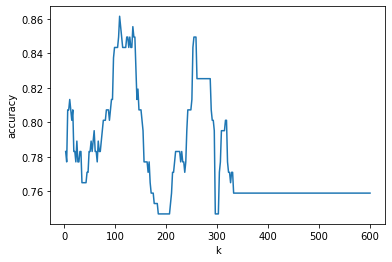

In [98]:
sns.lineplot(x=kacc.k, y=kacc.accuracy)